In [1]:
import os
import json
import pandas as pd

In [2]:
d = "/mnt/c/Users/trang.le/Desktop/shapemode"
PC = "PC1"
bins = [0,1,2]
df = pd.DataFrame()
for b in bins:
    f = open(f"{d}/covar/{PC}_{b}_cluster_assignation.json","r")
    cluster_assignation = json.load(f)
    bin_ = [cluster_assignation["ensembl_ids"][1:]] + [cluster_assignation["assignation"]] + [cluster_assignation["max_intensity"][1:]] + [cluster_assignation["mean_intensity"][1:]]
    tmp = pd.DataFrame(bin_).transpose()
    tmp.columns = ["ensembl_ids", f"assignation_b{b}", f"max_b{b}", f"mean_b{b}"]
    if df.empty:
        df = tmp
    else:
        df = df.merge(tmp, on="ensembl_ids")
    
#covar_mat = pd.read_csv(f"{d}/covar/{PC}_{b}.csv")

In [3]:
df.head()

,ensembl_ids,assignation_b0,max_b0,mean_b0,assignation_b1,max_b1,mean_b1,assignation_b2,max_b2,mean_b2
0,ENSG00000000003,4,1.0,0.161365,9,1.0,0.18068,3,1.0,0.178757
1,ENSG00000000457,8,1.0,0.353449,7,1.0,0.204334,5,1.0,0.206008
2,ENSG00000000938,2,0.5,0.08121,3,0.857143,0.113494,1,1.0,0.092959
3,ENSG00000001084,5,0.8,0.267225,1,0.72,0.255967,7,0.727273,0.201603
4,ENSG00000001167,5,1.0,0.450149,1,1.0,0.419299,7,1.0,0.396817


In [5]:
df["FC0_1"] = df["mean_b0"]/df["mean_b1"]
df["FC2_1"] = df["mean_b2"]/df["mean_b1"]
df["FC2_0"] = df["mean_b2"]/df["mean_b0"]
df["FC0_2"] = df["mean_b0"]/df["mean_b2"]

In [5]:
mappings = pd.read_csv(f"{d}/sl_pHPA_15_0.05_euclidean_100000_rmoutliers_ilsc_3d_bbox_rm_border.csv")
mappings = mappings[mappings.atlas_name=="U-2 OS"]

In [6]:
#df_sub = df.merge(mappings[~mappings.target.isin(["Negative","Multi-localization"])][["ensembl_ids","gene_names","target"]].drop_duplicates(), on="ensembl_ids")
df_sub = df.merge(mappings[["ensembl_ids","gene_names"]].drop_duplicates(), on="ensembl_ids")
df_sub.shape

(9621, 11)

In [53]:
tmp = df_sub[["gene_names","mean_b1"]]
tmp.groupby("gene_names").agg("mean").to_csv(f"{d}/tmp.tsv", sep="\t")

In [97]:
df_sub = df_sub[df_sub.FC0_2 > 1.5]
df_sub.shape, df_sub.mean_b0.nunique(), df_sub.columns

((1516, 15),
 1510,
 Index(['ensembl_ids', 'assignation_b0', 'max_b0', 'mean_b0', 'assignation_b1',
        'max_b1', 'mean_b1', 'assignation_b2', 'max_b2', 'mean_b2', 'FC0_1',
        'FC2_1', 'FC2_0', 'FC0_2', 'gene_names'],
       dtype='object'))

In [60]:
import gseapy
save_dir = f"{d}/gsea"
databases = ['GO_Biological_Process_2021', 'GO_Cellular_Component_2021', 'GO_Molecular_Function_2021', 'WikiPathway_2021_Human', 'KEGG_2021_Human']
gene_list = df_sub.gene_names.unique().tolist()
gene_list = [g.split(",")[0] for g in gene_list]
print(len(gene_list))
enr = gseapy.enrichr(gene_list=list(gene_list), gene_sets=databases, organism="human",
                 outdir=f'{save_dir}/{PC}_FC0_2_larger_1.5', background='hsapiens_gene_ensembl', cutoff=0.1, format='pdf')

9618


In [62]:
mappings[mappings.gene_names == 'TSPAN6']#gene_list[:3]

,x,y,z,id,location,location_code,locations,gene_names,ensembl_ids,atlas_name,ImageWidth,top,left,width,height,target,image_id,cell_id,nucleus_area,cell_area
147097,16.004934,7.032132,7.394511,4109_23_H11_1_1,Cytosol,16,Cytosol,TSPAN6,ENSG00000000003,U-2 OS,1728,0,0,1090,1158,Cytosol,23_H11_1,1,84688,699203
147098,16.231112,7.436333,6.877391,4109_23_H11_1_2,Cytosol,16,Cytosol,TSPAN6,ENSG00000000003,U-2 OS,1728,0,1035,970,527,Cytosol,23_H11_1,2,51968,271532
147099,16.965483,8.386467,6.049735,4109_23_H11_1_4,Cytosol,16,Cytosol,TSPAN6,ENSG00000000003,U-2 OS,1728,583,18,647,620,Cytosol,23_H11_1,4,50000,274718
147100,16.524746,6.900418,7.350491,4109_23_H11_1_5,Cytosol,16,Cytosol,TSPAN6,ENSG00000000003,U-2 OS,1728,794,374,934,1354,Cytosol,23_H11_1,5,82896,689339
918147,16.917955,8.822525,4.599361,4109_23_H11_2_2,Cytosol,16,Cytosol,TSPAN6,ENSG00000000003,U-2 OS,1728,0,155,488,839,Cytosol,23_H11_2,2,52368,263814
918148,17.397781,8.463158,6.450853,4109_23_H11_2_5,Cytosol,16,Cytosol,TSPAN6,ENSG00000000003,U-2 OS,1728,156,0,866,486,Cytosol,23_H11_2,5,42704,221185
918149,16.615288,7.446579,6.366881,4109_23_H11_2_6,Cytosol,16,Cytosol,TSPAN6,ENSG00000000003,U-2 OS,1728,158,958,532,563,Cytosol,23_H11_2,6,39808,154988
918150,17.374840,8.467697,6.027096,4109_23_H11_2_7,Cytosol,16,Cytosol,TSPAN6,ENSG00000000003,U-2 OS,1728,406,330,404,540,Cytosol,23_H11_2,7,38176,155271
918151,16.410454,7.735781,6.146353,4109_23_H11_2_8,Cytosol,16,Cytosol,TSPAN6,ENSG00000000003,U-2 OS,1728,427,226,975,804,Cytosol,23_H11_2,8,56080,281023
918152,15.901584,7.281605,7.131099,4109_23_H11_2_9,Cytosol,16,Cytosol,TSPAN6,ENSG00000000003,U-2 OS,1728,457,1090,845,638,Cytosol,23_H11_2,9,55216,243930


In [12]:
from gseapy import gseaplot, heatmap
gene_exp = 
mappings[mappings.ensembl_ids.isin(gene_list)]
gs_res = gp.gsea(data=gene_exp, # or data='./P53_resampling_data.txt'
                 gene_sets='./tests/extdata/h.all.v7.0.symbols.gmt', # or enrichr library names
                 cls= "./tests/extdata/Leukemia.cls", # cls=class_vector
                 # set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=1000, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 method='signal_to_noise',
                 threads=4, seed= 7)

dict_keys(['assignation', 'ensembl_ids', 'max_intensity', 'mean_intensity'])

In [13]:
bin_0 = [cluster_assignation["ensembl_ids"][1:]] + [cluster_assignation["assignation"]] + [cluster_assignation["max_intensity"][1:]] + [cluster_assignation["mean_intensity"][1:]]

In [20]:
cluster_assignation.keys()

dict_keys(['assignation', 'ensembl_ids'])

In [6]:
df0 = pd.read_csv(f"{d}/covar/{PC}_0_intensities.csv")
df1 = pd.read_csv(f"{d}/covar/{PC}_1_intensities.csv")

In [7]:
df0.shape, df1.shape

((5376, 9724), (5376, 9777))

In [10]:
df0.columns

Index(['Unnamed: 0', 'ENSG00000000003', 'ENSG00000000457', 'ENSG00000000938',
       'ENSG00000001084', 'ENSG00000001167', 'ENSG00000001460',
       'ENSG00000001461', 'ENSG00000001497', 'ENSG00000001629',
       ...
       'ENSG00000278318', 'ENSG00000278535', 'ENSG00000278540',
       'ENSG00000278619', 'ENSG00000278845', 'ENSG00000283632',
       'ENSG00000284308', 'ENSG00000284723', 'ENSG00000284753,ENSG00000284917',
       'ENSG00000284906,ENSG00000285077'],
      dtype='object', length=9724)

In [12]:
df0 = df0.drop(['Unnamed: 0'], axis=1).transpose()

In [16]:
df0["ensembl_ids"] = df0.index
df0 =  df0.merge(mappings[["ensembl_ids","gene_names"]].drop_duplicates(), on="ensembl_ids")

In [35]:
mappings

,0,1,2,3,4,5,6,7,8,9,...,5368,5369,5370,5371,5372,5373,5374,5375,ensembl_ids,gene_names
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000000003,TSPAN6
1,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000000457,SCYL3
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000000938,FGR
3,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000001084,GCLC
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000001167,NFYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000283632,EXOC3L2
9719,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,0.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000284308,C2orf81
9720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ENSG00000284723,OR8S1
9721,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"ENSG00000284753,ENSG00000284917","EEF1AKMT4,EEF1AKMT4-ECE2"


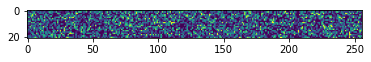

In [34]:
plt.imshow(df0.iloc[:5376,100].values.reshape((21,256)))

In [19]:
mappings.shape,mappings.gene_names.value_counts()

((262802, 20),
 PLPPR1     157
 TRAF4      151
 LRRD1      150
 SEMA6C     130
 SNW1       127
           ... 
 ESR1         7
 ZDHHC15      7
 PPCS         7
 MED31        7
 AFG3L2       7
 Name: gene_names, Length: 10009, dtype: int64)

(array([4.591e+03, 3.664e+03, 1.242e+03, 3.290e+02, 1.200e+02, 4.800e+01,
        6.000e+00, 4.000e+00, 2.000e+00, 3.000e+00]),
 array([  7.,  22.,  37.,  52.,  67.,  82.,  97., 112., 127., 142., 157.]),
 <BarContainer object of 10 artists>)

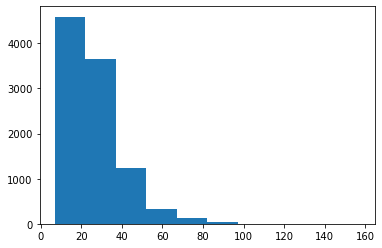

In [25]:
import matplotlib.pyplot as plt
plt.hist(mappings.gene_names.value_counts().values)

In [5]:
df_corr = pd.read_csv(f"{d}/covar/PC1_2.csv", index_col='ensembl_ids')

<AxesSubplot:ylabel='ensembl_ids'>

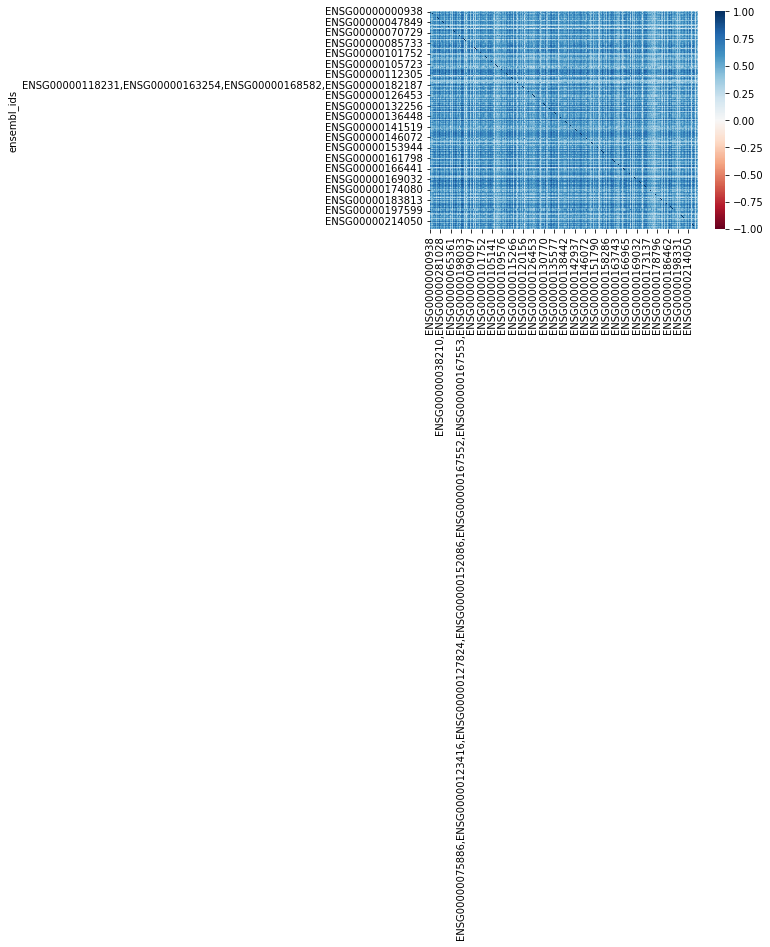

In [76]:
import seaborn as sns
idxes_a = np.where(np.array(cluster_assignation["assignation"])==1)[0]
idxes_b = np.where(np.array(cluster_assignation["assignation"])==7)[0]
sns.heatmap(df_corr.iloc[idxes_a,idxes_a], cmap="RdBu", vmin=-1, vmax=1)

In [64]:
df_corr_group = np.zeros((8,8))
for i in np.unique(cluster_assignation["assignation"]):
    idxes_i = np.where(np.array(cluster_assignation["assignation"])==i)[0]
    for j in np.unique(cluster_assignation["assignation"]):
        idxes_j = np.where(np.array(cluster_assignation["assignation"])==j)[0]
        df_corr_group[i-1, j-1] = df_corr.iloc[idxes_i, idxes_j].mean().mean()
    

In [75]:
df_corr.max(), df_corr.min()

(ENSG00000000003                    1.0
 ENSG00000000457                    1.0
 ENSG00000000938                    1.0
 ENSG00000001084                    1.0
 ENSG00000001167                    1.0
                                   ... 
 ENSG00000283632                    1.0
 ENSG00000284308                    1.0
 ENSG00000284723                    1.0
 ENSG00000284753,ENSG00000284917    1.0
 ENSG00000284906,ENSG00000285077    1.0
 Length: 9711, dtype: float64,
 ENSG00000000003                   -0.302063
 ENSG00000000457                   -0.314644
 ENSG00000000938                   -0.408555
 ENSG00000001084                   -0.637280
 ENSG00000001167                   -0.817052
                                      ...   
 ENSG00000283632                   -0.165085
 ENSG00000284308                   -0.392414
 ENSG00000284723                   -0.535940
 ENSG00000284753,ENSG00000284917   -0.803881
 ENSG00000284906,ENSG00000285077   -0.245596
 Length: 9711, dtype: float64)

<AxesSubplot:>

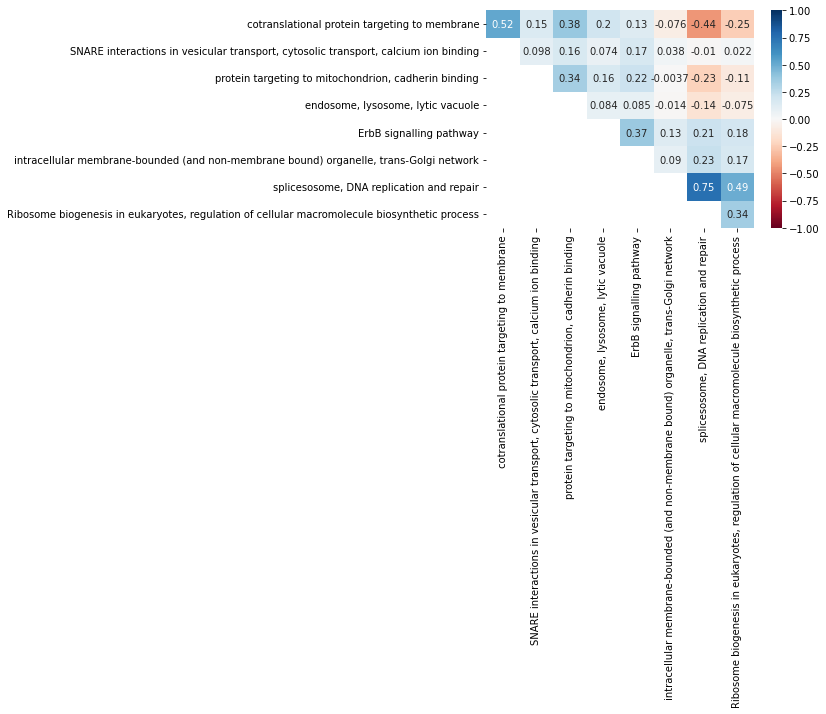

In [74]:
df_corr_group = pd.DataFrame(df_corr_group)
go_kegg = [" cotranslational protein targeting to membrane",
                         "SNARE interactions in vesicular transport, cytosolic transport, calcium ion binding",
                         "protein targeting to mitochondrion, cadherin binding",
                         "endosome, lysosome, lytic vacuole",
                         "ErbB signalling pathway",
                         "intracellular membrane-bounded (and non-membrane bound) organelle, trans-Golgi network",
                         "splicesosome, DNA replication and repair",
                         "Ribosome biogenesis in eukaryotes, regulation of cellular macromolecule biosynthetic process"]
df_corr_group.index = go_kegg
df_corr_group.columns = go_kegg
mask = np.tril(df_corr_group,k=-1)
sns.heatmap(df_corr_group, cmap="RdBu", vmin=-1, vmax=1, annot=True, mask=mask)

In [70]:
pd.DataFrame(np.triu(df_corr_group,k=-1))

,0,1,2,3,4,5,6,7
0,0.519138,0.147390,0.379530,0.196278,0.131903,-0.075572,-0.441332,-0.248549
1,0.147390,0.097973,0.163345,0.073820,0.165516,0.038286,-0.009980,0.021792
2,0.000000,0.163345,0.340371,0.164057,0.216899,-0.003656,-0.230330,-0.106779
3,0.000000,0.000000,0.164057,0.084071,0.084732,-0.013874,-0.143846,-0.075436
4,0.000000,0.000000,0.000000,0.084732,0.368869,0.130843,0.214864,0.184084
5,0.000000,0.000000,0.000000,0.000000,0.130843,0.090491,0.226611,0.167081
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.226611,0.750258,0.494589
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.494589,0.344494
